In [1]:
from datasets import train_dataloader, test_dataloader, BATCH_SIZE
from model import CNNModel
from matplotlib import pyplot as plt
import torch

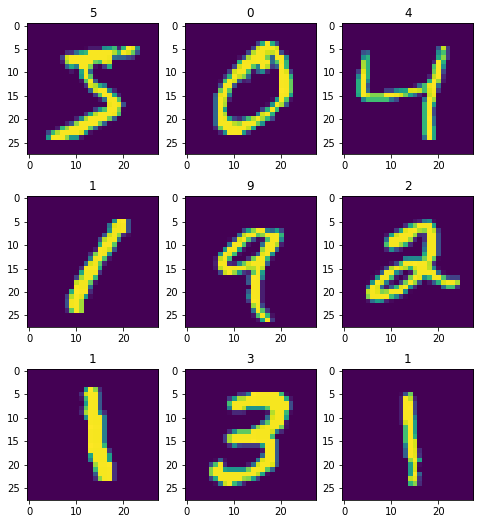

In [2]:
# visualize train dataset
for n, img in enumerate(train_dataloader.dataset):
    if n<9:
        plt.subplot(3, 3, n+1)
        plt.imshow(img[0].numpy()[0, :, :])
        plt.title(f'{img[1]}')
plt.gcf().set_size_inches(8, 9)
plt.show()

In [3]:
# create and train model
cnnmodel = CNNModel()

n_iters = 50
num_epochs = n_iters / (len(train_dataloader) / BATCH_SIZE)
num_epochs = int(num_epochs)
print(len(train_dataloader), num_epochs)
cnnmodel.train(train_dataloader, test_dataloader, 0.1, BATCH_SIZE, num_epochs)

1500 1
Epoch: 0  Iteration: 0  Train_Loss: 2.3076300621032715  Val_Loss: 2.3100531101226807  Accuracy: 11.850000381469727 %
Epoch: 0  Iteration: 100  Train_Loss: 0.299251914024353  Val_Loss: 0.3789892792701721  Accuracy: 91.62000274658203 %
Epoch: 0  Iteration: 200  Train_Loss: 0.18695193529129028  Val_Loss: 0.25105491280555725  Accuracy: 94.12999725341797 %
Epoch: 0  Iteration: 300  Train_Loss: 0.1670995056629181  Val_Loss: 0.2510017454624176  Accuracy: 95.31999969482422 %
Epoch: 0  Iteration: 400  Train_Loss: 0.19404231011867523  Val_Loss: 0.07243560254573822  Accuracy: 95.80000305175781 %
Epoch: 0  Iteration: 500  Train_Loss: 0.23523490130901337  Val_Loss: 0.22472865879535675  Accuracy: 95.77999877929688 %
Epoch: 0  Iteration: 600  Train_Loss: 0.16014869511127472  Val_Loss: 0.07777528464794159  Accuracy: 96.19999694824219 %
Epoch: 0  Iteration: 700  Train_Loss: 0.09724854677915573  Val_Loss: 0.16440728306770325  Accuracy: 96.69999694824219 %
Epoch: 0  Iteration: 800  Train_Loss: 0.1

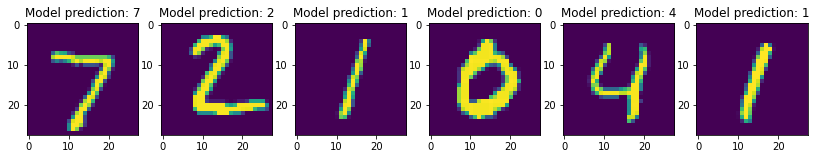

In [7]:
for i, (images, labels) in enumerate(test_dataloader):
    prediction = cnnmodel(images)
    for n, (digit, label) in enumerate(zip(images, labels)):
        prediction = torch.argmax(cnnmodel(digit))
        fpred = f'{prediction}'
        plt.subplot(1, 6, n+1)
        plt.imshow(digit.numpy()[0, :, :])
        plt.title(f'Model prediction: {fpred}')
        if n>4:
            break
    break
plt.gcf().set_size_inches(14, 10)
plt.show()

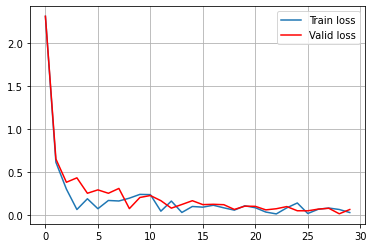

In [10]:
plt.plot(cnnmodel.train_loss_list, label='Train loss')
plt.plot(cnnmodel.val_loss_list, 'r', label='Valid loss')
plt.grid()
plt.legend()
plt.show()